In [4]:
from matplotlib import image as img
image = img.imread('/content/drive/MyDrive/Colab Notebooks/data/suryaansh-maithani-KPPl5fbNDSw-unsplash.jpg')
image.shape

(2592, 3888, 3)

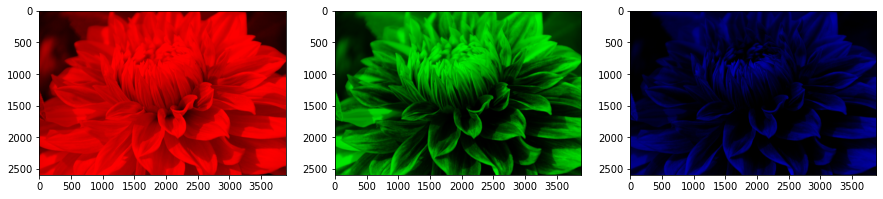

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    
    # initiate a zero matrix with dtype as unit8 as the R,G,B values are between 0 to 255
    channel = np.zeros(image.shape, dtype="uint8")
    
    # only allow one color at each time
    channel[:, :, c] = image[:, :, c]
    
    # display each channel
    ax.imshow(channel)

In [8]:
from scipy.cluster.vq import whiten
import pandas as pd
#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,71,58,13
1,70,57,12
2,70,57,12
3,69,56,11
4,69,56,12


In [9]:
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,71,58,13,1.216797,0.872469,0.318023
1,70,57,12,1.199659,0.857426,0.293559
2,70,57,12,1.199659,0.857426,0.293559
3,69,56,11,1.182521,0.842383,0.269096
4,69,56,12,1.182521,0.842383,0.293559


In [11]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)
cluster_centers

array([[2.65190322, 0.32288244, 0.18778403],
       [3.34719494, 1.11810778, 0.88423015],
       [3.69142653, 2.20978187, 1.50500278],
       [4.14670879, 2.77116713, 2.83803114],
       [1.02232175, 0.67826886, 0.31064046]])

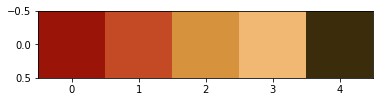

[(154, 21, 7), (195, 74, 36), (215, 146, 61), (241, 184, 116), (59, 45, 12)]

In [12]:
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()
colors